# Red Wine Quality Project

In this notebook, First I have done some exploration on the data using matplotlib and seaborn. Then, I used different classifier models to predict the quality of the wine.

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report 


In [2]:
# Wine data set
wine=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.shape


(1599, 12)

In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# See the correlation among the features

In [8]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


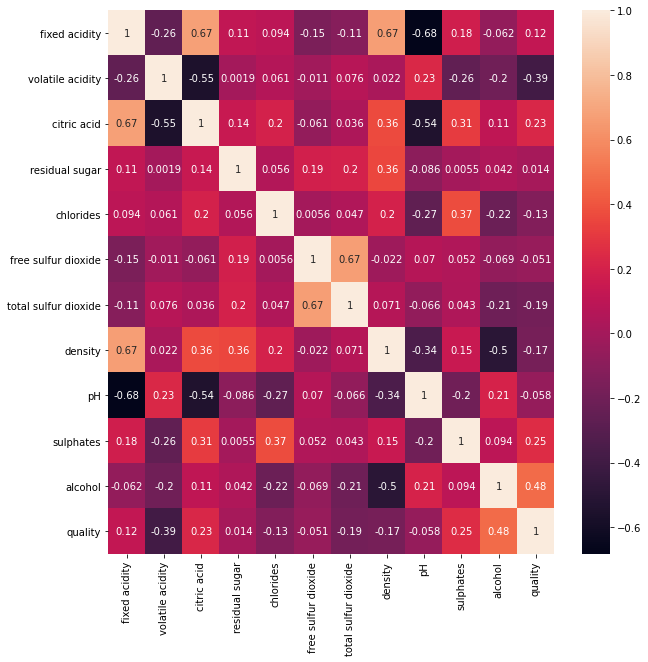

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),annot=True)
plt.show() 

# Let's do some plotting to know how the data columns are distributed in the dataset

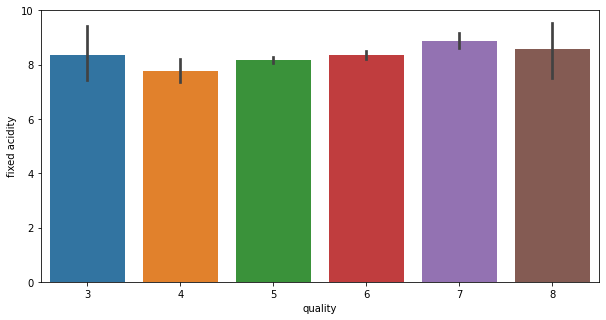

In [10]:
# we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,5))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
plt.show()

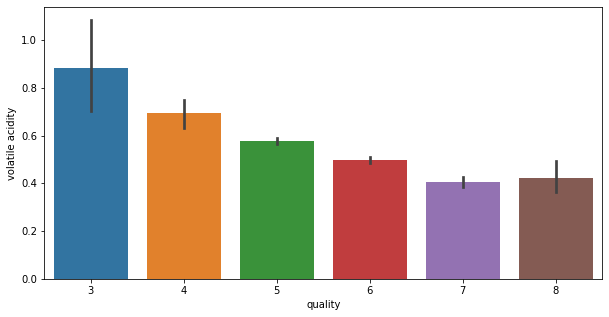

In [11]:
# we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)
plt.show()

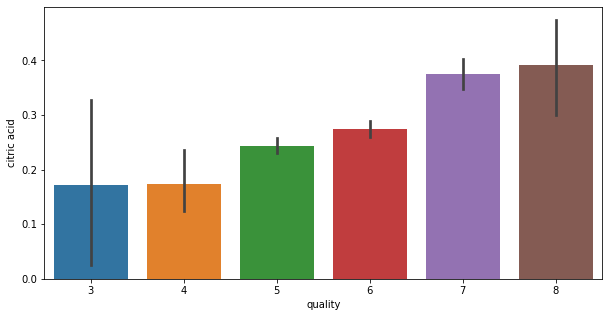

In [12]:
# Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
plt.show()

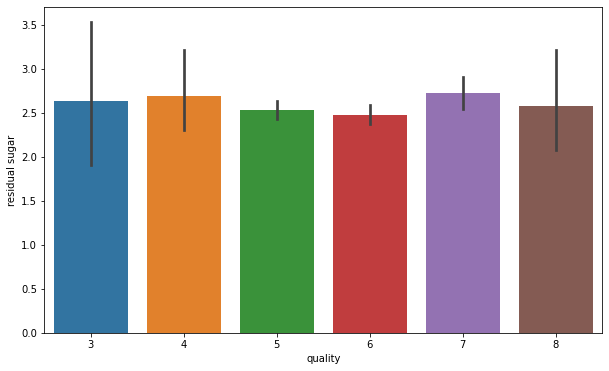

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)
plt.show()

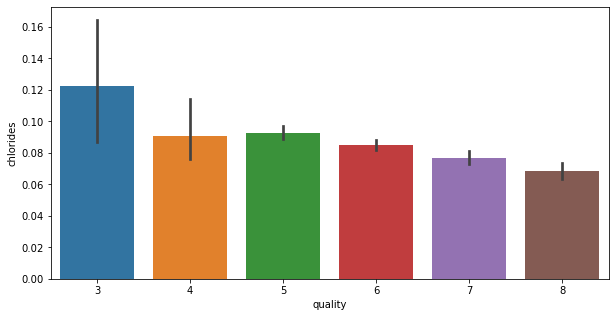

In [14]:
# Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,5))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)
plt.show()

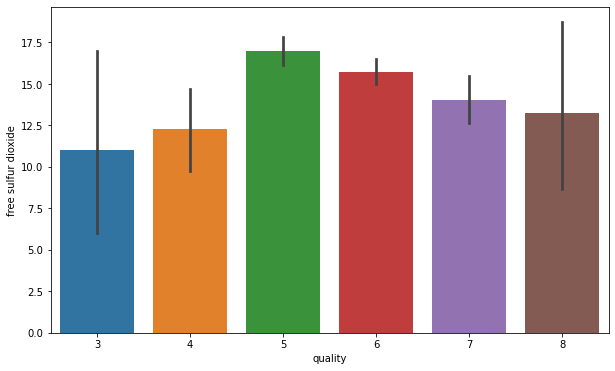

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)
plt.show()

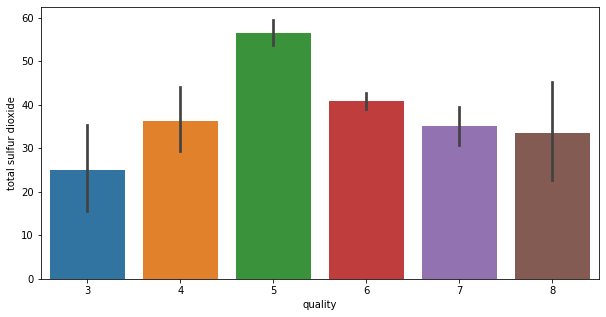

In [16]:
fig = plt.figure(figsize = (10,5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)
plt.show()

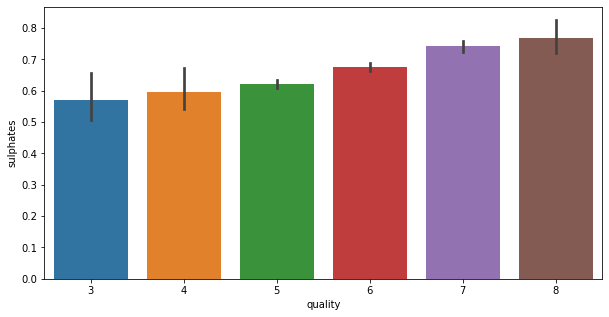

In [17]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,5))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)
plt.show()

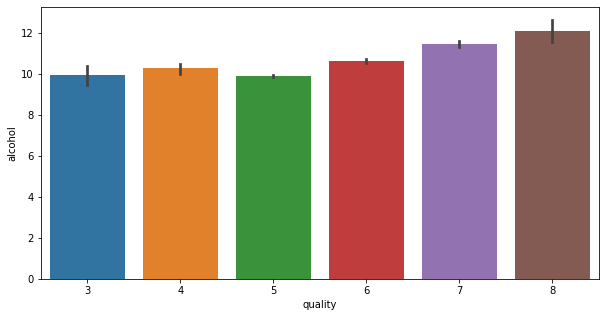

In [18]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,5))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)
plt.show()

# Preprocessing Data for performing Machine learning algorithms¶

In [19]:
# Making binary classificaion for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [20]:
# Now lets assign a labels to our quality variable
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_quality = LabelEncoder()

In [21]:
# Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [22]:
# Value counts
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


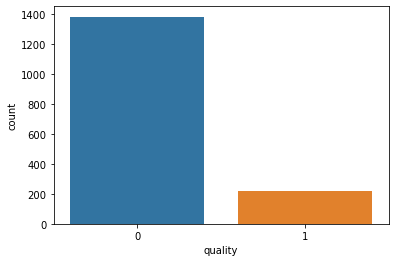

In [23]:
# count plot of wine quality
sns.countplot(wine['quality'])
plt.show()

# Dependent and Independent Variables

In [24]:
# Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)    # Dependent Variables
y = wine['quality']                   # Independent Variables

# Train_Test_split

In [25]:
# Train and Test splitting of data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature Scaling

In [26]:
# Applying Standard scaling to get optimized result
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Decision Tree Classifier

In [27]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [28]:
# Fit Method
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# Predict Method
y_pred = dtc.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.92      0.92       273
           1       0.52      0.49      0.51        47

    accuracy                           0.86       320
   macro avg       0.72      0.71      0.71       320
weighted avg       0.86      0.86      0.86       320



In [31]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test, y_pred)

array([[252,  21],
       [ 24,  23]], dtype=int64)

In [33]:
(251+20)/(251+22+27+20)

0.846875

# Random Forest Classifier

In [34]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

In [35]:
# Fit Model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [36]:
# Model predict
pred_rfc = rfc.predict(X_test)

In [37]:
# Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.67      0.38      0.49        47

    accuracy                           0.88       320
   macro avg       0.78      0.68      0.71       320
weighted avg       0.87      0.88      0.87       320



Random forest gives the accuracy of 87%

In [38]:
# Confusion matrix for the random forest classification
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 29  18]]


In [39]:
# Accuracy
(265+18)/(265+8+29+18)

0.884375

# Support Vector Classifier

In [40]:
# Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()

In [41]:
# Fit model
svc.fit(X_train, y_train)

SVC()

In [42]:
# Predict Model
pred_svc = svc.predict(X_test)

In [43]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



Support vector classifier gets 86%

In [44]:
# Confusion matrix for the random forest classification
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 29  18]]


In [45]:
# Accuracy
(265+18)/(265+18+29+8)

0.884375

# Increase our accuracy of models by Hyper Parameter Tuning

# Grid Search CV

In [46]:
# Finding best parameters for our SVC model
from sklearn.model_selection import GridSearchCV, cross_val_score
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [47]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [48]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [49]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



SVC improves from 86% to 90% using Grid Search CV

# Cross Validation Score for random forest and SGD

In [50]:
# Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9124384842519685

Random forest accuracy increases from 88% to 91 % using cross validation score

# ROC AUC plot

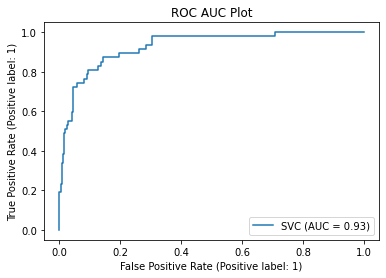

In [51]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid_svc.best_estimator_,X_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

In [52]:
# Saving the model in pickle format
import joblib
joblib.dump(grid_svc.best_estimator_,"WineModel.pkl")

['WineModel.pkl']